---
# Brief
---
**Your goal**: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.


1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv]

3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

Detect and document at least
* **Eight quality issues**
* **Two tidiness issues**


* **three insights** 
* **one visualization**

* Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

* Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.


## Basic wrangling strategy

1. Gather all data sets, document issues pertinent to every dataset in the process.
2. Merge all data sets.
3. Remove null, duplicate and redundant data.
4. Resolve quality issues.
5. Resolve tidiness issues.
6. Find three insights.
7. Create visualization.


In [1]:
import requests as rq
import pandas as pd
import numpy as np
import io
import json
from random import randrange, choice
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


---
# Gather data
---

## Dataset 1: Enhanced twitter archive
### Read the enhanced twitter archive into a dataframe

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Dataset 2: Image predictions

### Download the tweet image predictions

In [5]:
r = rq.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r.status_code

200

In [6]:
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [7]:
r.encoding

'utf-8'

#### Load the received .tsv file into a dataframe

In [8]:
# load image predictions dataset from a local file
image_predictions = pd.DataFrame.from_csv('image-predictions.tsv', sep='\t')

/Users/s8/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [9]:
# load image predictions dataset from the URL
image_predictions = pd.DataFrame.from_csv(io.StringIO(r.content.decode(r.encoding)), sep='\t')

/Users/s8/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [10]:
image_predictions.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


### Merge twitter archive and image predictions

In [12]:
merged_df = pd.merge(twitter_archive,image_predictions,how='inner',on='tweet_id')

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

In [14]:
print ('twitter archive size: ', len(twitter_archive))
print ('image predictions size: ', len(image_predictions))
print ('merged dataframe size: ', len(merged_df))

twitter archive size:  2356
image predictions size:  2075
merged dataframe size:  2075


The size of the new merged dataframe is the same as the image predictions dataframe, which means that all the records from `image_precdictions` were kept.

## Dataset 3: Twitter via API

### Set up Twitter API via tweepy

In [15]:
import tweepy

TWITTER_CONSUMER_KEY = ''
TWITTER_CONSUMER_SECRET = ''
ACCESS_TOKEN = ''
ACCESS_SECRET = ''

auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
api.wait_on_rate_limit = True

### Download WeRateDogs Twitter archive. Takes around 30 mins.

In [ ]:
# create an empty array to store dictionaries retrieved via API
tweets = []
missing_tweets = []

# use tweet_id's from our dataframe to retrieve original tweets
for i in merged_df.tweet_id:
    try:
        tweets.append (api.get_status(i, tweet_mode='extended'))
    except:
        missing_tweets.append(i)
        print ('tweet #', i, ' could not be located')
            
# write downloaded tweets to a json file and store it locally            
with open('tweets.json', 'w') as outfile:
    json.dump(tweets, outfile)

### Read the downloaded and saved archive from a local .json file

In [16]:
tweets = pd.read_json ('tweets.json')

In [17]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 28 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2061 non-null datetime64[ns]
display_text_range               2061 non-null object
entities                         2061 non-null object
extended_entities                2061 non-null object
favorite_count                   2061 non-null int64
favorited                        2061 non-null bool
full_text                        2061 non-null object
geo                              0 non-null float64
id                               2061 non-null int64
id_str                           2061 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null float64
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 n

In [18]:
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36940,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,en,None,False,False,7873,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31781,False,This is Tilly. She's just checking pup on you....,NaN,...,en,None,False,False,5844,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23952,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,en,None,False,False,3859,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40263,False,This is Darla. She commenced a snooze mid meal...,NaN,...,en,None,False,False,8042,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38458,False,This is Franklin. He would like you to stop ca...,NaN,...,en,None,False,False,8701,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Merge tweets with two previous datasets

In [19]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 28 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2061 non-null datetime64[ns]
display_text_range               2061 non-null object
entities                         2061 non-null object
extended_entities                2061 non-null object
favorite_count                   2061 non-null int64
favorited                        2061 non-null bool
full_text                        2061 non-null object
geo                              0 non-null float64
id                               2061 non-null int64
id_str                           2061 non-null int64
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null float64
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 n

`tweets` JSON has two representations of ID - `int` and `str`. Twitter documentation recommends using the `str` representation as "some programming languages may have difficulty / silent defects in interpreting [`int` id]".


Let's see whether there is any difference between the records.

In [20]:
# how many tweets have mismatching `id` and `id_str` record
len(tweets[(tweets['id'] - tweets['id_str'])!=0])

718

That's quite a bit. More than 1/3 of mismatches.

After a bit of research it appeared that the `id_str` column gets corrupted at the import stage - it gets automatically converted into an `int64` and corrupted along the way. To prevent this from happening - it's important to prevent `read_json` from inferring datatypes.

In [21]:
tweets = pd.read_json ('tweets.json', dtype=False)

In [22]:
len(tweets[(tweets['id'] - tweets['id_str'].astype(int))!=0])

0

In [23]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 28 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2061 non-null datetime64[ns]
display_text_range               2061 non-null object
entities                         2061 non-null object
extended_entities                2061 non-null object
favorite_count                   2061 non-null int64
favorited                        2061 non-null bool
full_text                        2061 non-null object
geo                              0 non-null object
id                               2061 non-null int64
id_str                           2061 non-null object
in_reply_to_screen_name          23 non-null object
in_reply_to_status_id            23 non-null float64
in_reply_to_status_id_str        23 non-null object
in_reply_to_user_id              23 non-null float64
in_reply_to_user_id_str          23 non-

Let's merge `tweets` dataframe with the other two.

In [24]:
tweets['tweet_id'] = tweets['id']
we_rate_dogs = pd.merge(merged_df,tweets, how='inner')

Now let's see how much was merged

In [25]:
len(we_rate_dogs) - len(tweets)

0

The two are the same length which means that all records were merged. Good.

---
# Assess data
---

Let's take a quick overview of the complete merged dataset that we've created.

In [26]:
we_rate_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,truncated,user
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,en,None,False,False,7873,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,False,en,None,False,False,5844,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,False,en,None,False,False,3859,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,en,None,False,False,8042,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,False,en,None,False,False,8701,False,NaN,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [27]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 53 columns):
tweet_id                         2061 non-null int64
in_reply_to_status_id            23 non-null float64
in_reply_to_user_id              23 non-null float64
timestamp                        2061 non-null object
source                           2061 non-null object
text                             2061 non-null object
retweeted_status_id              74 non-null float64
retweeted_status_user_id         74 non-null float64
retweeted_status_timestamp       74 non-null object
expanded_urls                    2061 non-null object
rating_numerator                 2061 non-null int64
rating_denominator               2061 non-null int64
name                             2061 non-null object
doggo                            2061 non-null object
floofer                          2061 non-null object
pupper                           2061 non-null object
puppo                            2061 

How many columns of data do we have after merging all datasets.

In [28]:
print (len(we_rate_dogs.columns))

53


## Duplicate, zero and redundant data
First let's assess whether there are any columns that contain no data whatsoever or that are irrelevant for the purposes of our analysis. Let's make empty lists which we will populate over the course of our assessment and drop remove them from the dataframe.

### Duplicate columns
Some of the data is duplicated across columns

In [29]:
# let's make an empty list to hold column names with duplicate data
duplicate_columns = []

Tweet data structure duplicates certain columns in `int64` and `str` representations to prevent  being corrupted. Let's check our records are intact and get rid of the columns we don't need.

These are `id`, `in_reply_to_user_id` and `in_reply_to_status_id`

In [30]:
# let's store the in_reply_to_status_id_str and in_reply_to_status_id columns in Series
ID_str = we_rate_dogs[we_rate_dogs.id_str.notna()].id_str.astype(int)
ID = we_rate_dogs[we_rate_dogs.id.notna()].id
# subtracting them from each other and summing the output - would flag whether there're any differences between the two series
print (sum (ID_str - ID))

0


In [31]:
duplicate_columns.append('id_str')

In [32]:
# let's store the in_reply_to_status_id_str and in_reply_to_status_id columns in Series
IRTSID_str = we_rate_dogs[we_rate_dogs.in_reply_to_status_id_str.notna()].in_reply_to_status_id_str.astype(int)
IRTSID = we_rate_dogs[we_rate_dogs.in_reply_to_status_id.notna()].in_reply_to_status_id
# subtracting them from each other and summing the output - would flag whether there're any differences between the two series
print (sum (IRTSID_str - IRTSID))

0.0


In [33]:
duplicate_columns.append('in_reply_to_status_id_str')

In [34]:
# let's store the in_reply_to_user_id_str and in_reply_to_user_id columns in Series
IRTUID_str = we_rate_dogs[we_rate_dogs.in_reply_to_user_id_str.notna()].in_reply_to_user_id_str.astype(int)
IRTUID = we_rate_dogs[we_rate_dogs.in_reply_to_user_id.notna()].in_reply_to_user_id
# subtracting them from each other and summing the output - would flag whether there're any differences between the two series
print (sum (IRTUID_str - IRTUID))

0.0


In [35]:
duplicate_columns.append('in_reply_to_user_id_str')

`timestamp` and `created_at` columns probably contain identical set of records. Let's subtract two columns from each other and see how many unique differences are there.

In [36]:
# we have to remove timezone data to perform arithmetic on timestamps
column_created = we_rate_dogs.created_at.dt.tz_localize(None)
column_timestamp = we_rate_dogs.timestamp.apply(lambda x: pd.Timestamp(x)).dt.tz_localize(None)

(column_created - column_timestamp).unique()

array([0], dtype='timedelta64[ns]')

There's only one unique value and that value is `0`. We can conclude that both columns contain indentical sets of data. Therefore let's add one of them to the `duplicate_columns` list for future removal. As `created_at` is the original field from tweet json and is represented in correct data type - let's keep it and remove the `timestamp` column.

In [37]:
duplicate_columns.append('timestamp')

In [38]:
print ('duplicate_columns: ', duplicate_columns)

duplicate_columns:  ['id_str', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'timestamp']


Two other columns look suspiciously similarly named: `tweet_id` and `id`. Let's check if they're any different from each other.

In [39]:
sum (we_rate_dogs.tweet_id - we_rate_dogs.id)

0

They're not. 

In [40]:
duplicate_columns.append('tweet_id')

### Zero columns

In [41]:
# let's make an empty list to hold column names with no data in them
zero_columns = []

Summing data in columns highlights some of the empty variables.

In [42]:
zeros = we_rate_dogs.sum(axis=0) == 0

In [43]:
zeros.index[zeros]

Index(['contributors', 'coordinates', 'favorited', 'geo', 'is_quote_status',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'retweeted',
       'truncated'],
      dtype='object')

In [44]:
# make list of all zero-value columns
zero_columns.extend(we_rate_dogs[zeros.index[zeros]].columns)

### Redundant columns
some of the data in this set is not relevant to our future analysis. let's put it aside.

In [45]:
# let's make an empty list to hold column names with data not pertinent to our analysis
redundant_columns = []

It seems that there is only one record in the 'place' column. What is it?

In [46]:
we_rate_dogs[we_rate_dogs.place.notnull()].place

686    {'id': '7356b662670b2c31', 'url': 'https://api...
Name: place, dtype: object

Let's store this place in a separate variable and remove the column.

In [47]:
wrd_place = we_rate_dogs.iloc[686]

Retweets and status replies comprise only a small fraction of tweets for this account. Let's store them in separate dataframes and remove from our main analysis.

In [48]:
for i in we_rate_dogs.columns:
    c = we_rate_dogs[i].notna()
    c = len(c.index[c])
    if 0<c<len(we_rate_dogs):
        redundant_columns.append(i)
        print (c,' : ', i)

23  :  in_reply_to_status_id
23  :  in_reply_to_user_id
74  :  retweeted_status_id
74  :  retweeted_status_user_id
74  :  retweeted_status_timestamp
23  :  in_reply_to_screen_name
23  :  in_reply_to_status_id_str
23  :  in_reply_to_user_id_str
1  :  place
74  :  retweeted_status


In [49]:
replies_01 = we_rate_dogs[we_rate_dogs.in_reply_to_status_id.notna()]
replies_02 = we_rate_dogs[we_rate_dogs.in_reply_to_user_id.notna()]
retweets_01 = we_rate_dogs[we_rate_dogs.retweeted_status.notna()]
retweets_02 = we_rate_dogs[we_rate_dogs.retweeted_status_id.notna()]
retweets_03 = we_rate_dogs[we_rate_dogs.retweeted_status_user_id.notna()]
retweets_04 = we_rate_dogs[we_rate_dogs.retweeted_status_timestamp.notna()]

As we're only looking into tweets from a single account - the column `user` just duplicates the same information in every record. Let's store it to a separate variable and get rid of the whole column.

In [50]:
we_rate_dogs[we_rate_dogs.user.apply(lambda x: x['id']) != 4196983835]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,truncated,user


In [51]:
wrd_user = we_rate_dogs.iloc[0].user
redundant_columns.append('user')

In [52]:
redundant_columns

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'in_reply_to_screen_name',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id_str',
 'place',
 'retweeted_status',
 'user']

## Incorrect data types.

Some of the columns are `object` type, whereas they can be better represented by more specific variable types. Namely: 

`
doggo                            object >> bool
floofer                          object >> bool
pupper                           object >> bool
puppo                            object >> bool
lang                             object >> category
`

## Badly formatted data
### `expanded_urls` column
`expanded_urls` column contains long strings of multiple, often duplicate, URLs. They need to be parsed, duplicates removed, and stored in lists. Let's look how such an entry looks like.

In [53]:
we_rate_dogs.expanded_urls[145]

'https://www.gofundme.com/meeko-needs-heart-surgery,https://twitter.com/dog_rates/status/857393404942143489/photo/1,https://twitter.com/dog_rates/status/857393404942143489/photo/1,https://twitter.com/dog_rates/status/857393404942143489/photo/1,https://twitter.com/dog_rates/status/857393404942143489/photo/1'

### `source` column
`source` column contains messy long URLs, which, when parsed correctly can be best represented by a `category` type variable.

In [54]:
we_rate_dogs.source[145]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

### Hashtags

Hashtags are hidden deep inside hierarchical dictionaries. As they are very valuable analysis material - they'd rather be unpacked into a separate column.

In [55]:
we_rate_dogs.entities.iloc[10]['hashtags']

[{'text': 'BarkWeek', 'indices': [121, 130]}]

---
# Clean data
---
After assessing the data - it's time to clean it.

Let's keep the original in place and work on the copy.

In [56]:
wrd = we_rate_dogs.copy()

## Quality issues

### Redundant data

#### Define
get rid of retweet and reply data as it's not relevant to our analysis

In [57]:
redundant_columns

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'in_reply_to_screen_name',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id_str',
 'place',
 'retweeted_status',
 'user']

#### Code

In [58]:
wrd.drop(columns=redundant_columns, axis=1, inplace=True)

#### Test

In [59]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 42 columns):
tweet_id                         2061 non-null int64
timestamp                        2061 non-null object
source                           2061 non-null object
text                             2061 non-null object
expanded_urls                    2061 non-null object
rating_numerator                 2061 non-null int64
rating_denominator               2061 non-null int64
name                             2061 non-null object
doggo                            2061 non-null object
floofer                          2061 non-null object
pupper                           2061 non-null object
puppo                            2061 non-null object
jpg_url                          2061 non-null object
img_num                          2061 non-null int64
p1                               2061 non-null object
p1_conf                          2061 non-null float64
p1_dog                          

### Zero data

#### Define
Columns with zero data are irrelevant for our analysis. Let's just drop them.

In [60]:
zero_columns

['contributors',
 'coordinates',
 'favorited',
 'geo',
 'is_quote_status',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'retweeted',
 'truncated']

#### Code

In [61]:
wrd.drop(columns=zero_columns, axis=1, inplace=True)

#### Test

In [62]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 33 columns):
tweet_id              2061 non-null int64
timestamp             2061 non-null object
source                2061 non-null object
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  2061 non-null object
doggo                 2061 non-null object
floofer               2061 non-null object
pupper                2061 non-null object
puppo                 2061 non-null object
jpg_url               2061 non-null object
img_num               2061 non-null int64
p1                    2061 non-null object
p1_conf               2061 non-null float64
p1_dog                2061 non-null bool
p2                    2061 non-null object
p2_conf               2061 non-null float64
p2_dog                2061 non-null bool
p3                    2061 non-null obj

### Duplicate data

#### Define

In [63]:
duplicate_columns

['id_str',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id_str',
 'timestamp',
 'tweet_id']

#### Code

As two reply columns we've already removed with redundant data. Let's only remove `id`, `id_str` and  `timestamp` now.

In [64]:
wrd.drop(columns=['id','id_str','timestamp'], axis=1, inplace=True)

#### Test

In [65]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id              2061 non-null int64
source                2061 non-null object
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  2061 non-null object
doggo                 2061 non-null object
floofer               2061 non-null object
pupper                2061 non-null object
puppo                 2061 non-null object
jpg_url               2061 non-null object
img_num               2061 non-null int64
p1                    2061 non-null object
p1_conf               2061 non-null float64
p1_dog                2061 non-null bool
p2                    2061 non-null object
p2_conf               2061 non-null float64
p2_dog                2061 non-null bool
p3                    2061 non-null object
p3_conf               2061 non-null flo

### Dog columns to bools

#### Define
`doggo`, `floofer`, `pupper`, `puppo` columns are better represented as `bool`s.

#### Code

In [66]:
def to_bool(x):
    if x=='None':
        return False
    else:
        return True
    
wrd.doggo = wrd.doggo.apply(to_bool)
wrd.floofer = wrd.floofer.apply(to_bool)
wrd.pupper = wrd.pupper.apply(to_bool)
wrd.puppo = wrd.puppo.apply(to_bool)

#### Test

In [67]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id              2061 non-null int64
source                2061 non-null object
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  2061 non-null object
doggo                 2061 non-null bool
floofer               2061 non-null bool
pupper                2061 non-null bool
puppo                 2061 non-null bool
jpg_url               2061 non-null object
img_num               2061 non-null int64
p1                    2061 non-null object
p1_conf               2061 non-null float64
p1_dog                2061 non-null bool
p2                    2061 non-null object
p2_conf               2061 non-null float64
p2_dog                2061 non-null bool
p3                    2061 non-null object
p3_conf               2061 non-null float64
p3_

### Lang column to category

#### Define
Convert lang column into category.

#### Code

In [68]:
wrd.lang = wrd.lang.astype('category')

#### Test

In [69]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id              2061 non-null int64
source                2061 non-null object
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  2061 non-null object
doggo                 2061 non-null bool
floofer               2061 non-null bool
pupper                2061 non-null bool
puppo                 2061 non-null bool
jpg_url               2061 non-null object
img_num               2061 non-null int64
p1                    2061 non-null object
p1_conf               2061 non-null float64
p1_dog                2061 non-null bool
p2                    2061 non-null object
p2_conf               2061 non-null float64
p2_dog                2061 non-null bool
p3                    2061 non-null object
p3_conf               2061 non-null float64
p3_

### Display_text_range into int

#### Define
`display_text_range` column can be effectively reduced to a single `int` rather than a list.

#### Code

In [70]:
wrd['display_text_end'] = wrd.display_text_range.apply(lambda x: x[1]).astype(int)
wrd.drop(columns='display_text_range', inplace=True)

#### Test

In [71]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id              2061 non-null int64
source                2061 non-null object
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  2061 non-null object
doggo                 2061 non-null bool
floofer               2061 non-null bool
pupper                2061 non-null bool
puppo                 2061 non-null bool
jpg_url               2061 non-null object
img_num               2061 non-null int64
p1                    2061 non-null object
p1_conf               2061 non-null float64
p1_dog                2061 non-null bool
p2                    2061 non-null object
p2_conf               2061 non-null float64
p2_dog                2061 non-null bool
p3                    2061 non-null object
p3_conf               2061 non-null float64
p3_

### Parse `source` column and make it categorical variable

#### Define
There is probablay a limited set of appications used to post tweets. Let's extract those from the long strings and categorise them.

#### Code

In [72]:
wrd.source = wrd.source.apply(lambda x: x.split('>')[1].split('<')[0]).astype('category')

#### Test

In [73]:
wrd.source.unique()

[Twitter for iPhone, Twitter Web Client, TweetDeck]
Categories (3, object): [Twitter for iPhone, Twitter Web Client, TweetDeck]

In [74]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id              2061 non-null int64
source                2061 non-null category
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  2061 non-null object
doggo                 2061 non-null bool
floofer               2061 non-null bool
pupper                2061 non-null bool
puppo                 2061 non-null bool
jpg_url               2061 non-null object
img_num               2061 non-null int64
p1                    2061 non-null object
p1_conf               2061 non-null float64
p1_dog                2061 non-null bool
p2                    2061 non-null object
p2_conf               2061 non-null float64
p2_dog                2061 non-null bool
p3                    2061 non-null object
p3_conf               2061 non-null float64
p

## Tidiness issues

### Unpack hashtags from dictionaries

#### Define
Hashtags are nested deep inside dictionaries. To be useful for analysis - they need to be extracted into a separate column.

#### Code

In [75]:
wrd['hashtags'] = wrd.entities.apply(lambda x: x['hashtags'])

In [76]:
def unpack_hashtags(x):
    try:
        return x[0]['text']
    except:
        return None
        
wrd.hashtags = wrd.hashtags.apply(lambda x: unpack_hashtags(x))

In [77]:
wrd.hashtags.unique()

array([None, 'BarkWeek', 'Canada150', 'PrideMonthPuppo', 'PrideMonth',
       'dogsatpollingstations', 'ScienceMarch', 'K9VeteransDay',
       'GoodDogs', 'WKCDogShow', 'BellLetsTalk', 'WomensMarch',
       'FinalFur', 'LoveTwitter', 'notallpuppers', 'NoDaysOff'],
      dtype=object)

#### Test

### Unpack URLs from dictionaries

#### Define
Same as hashtags - urls are nested deep inside dictionaries. They need to be extracted into a separate column.

#### Code

In [78]:
# take the single tweet url into a separate column
wrd['url'] = wrd.entities.apply(lambda x: x['media'][0]['url'])

In [79]:
# take all other urls into a separate column
wrd['expanded_urls'] = wrd.expanded_urls.apply(lambda x: x.split(','))

#### Test

In [80]:
r = randrange(0,len(wrd))
print(r, ' : ', wrd.iloc[r]['url'])

524  :  https://t.co/dgvTPZ9tgI


In [81]:
# select a random item from list of entriel where 'urls' contains more than one entry
r = choice(wrd[wrd['expanded_urls'].apply(lambda x: len(x) > 1)]['expanded_urls'].index)
print(r, ' : ', wrd.iloc[r]['expanded_urls'])

1081  :  ['https://twitter.com/dog_rates/status/707315916783140866/photo/1', 'https://twitter.com/dog_rates/status/707315916783140866/photo/1']


now that the relevant information has been extracted from `entities` and `extended_entities` columns - we can drop them.

In [102]:
wrd.drop(['entities', 'extended_entities'], axis=1,inplace=True)

In [104]:
wrd.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'favorite_count',
       'full_text', 'lang', 'retweet_count', 'display_text_end', 'hashtags',
       'url'],
      dtype='object')

# Insights

In [83]:
wrd.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'full_text', 'lang',
       'retweet_count', 'display_text_end', 'hashtags', 'url'],
      dtype='object')

## Favorites and retweet correlation

let's do a scatter plot of the `favorite_count` and `retweet_count` columns to see whether there is any correlation between the two. As an added insight - let's colour the points with `rating_numerator` values to see whether this correlates as well.

Text(46.17760803472221, 0.5, 'retweets')

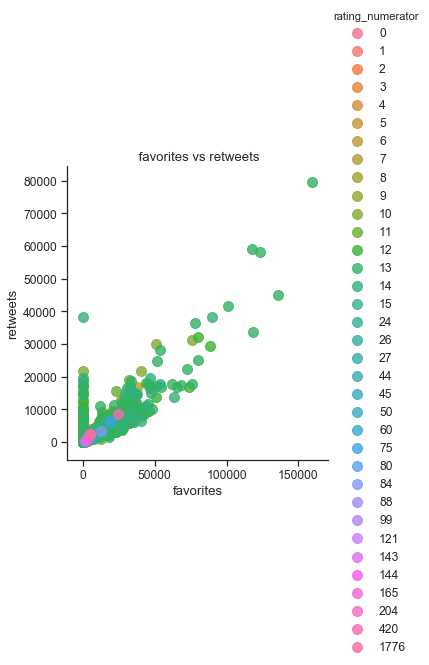

In [139]:
# Set style of scatterplot
sb.set_context("notebook", font_scale=1.1)
sb.set_style("ticks")

# Create scatterplot of dataframe
sb.lmplot('favorite_count', # Horizontal axis
           'retweet_count', # Vertical axis
           data=wrd, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='rating_numerator', # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100}) # S marker size

# Set title
plt.title(' favorites vs retweets')

# Set x-axis label
plt.xlabel('favorites')

# Set y-axis label
plt.ylabel('retweets')

Apart from the group that has zero favorites and numerous retweets - the two values seem to be almost linearly related. This is most likely a data quality issue, but we won't go into that with this analysis.

In [ ]:
wrd[wrd['retweet_count'] > 38000]

In [ ]:
wrd[wrd['favorite_count'] == 0]

In [ ]:
wrd[wrd['rating_numerator'] == 0]